**Project Name- Predicting Approval for Bank Loan**

 

**Group Members - 1)Mahesh Somase,2)Chetan Bhamre,3)Manoj Patil,4)Parag pal,5)sanjana Ahire **

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

Data Collection and Processing

In [2]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('bankloan.csv')

In [3]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [4]:
# printing the first 5 rows of the dataframe
loan_dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360,1,Urban,Y


In [5]:
# printing the last 5 rows of the dataframe
loan_dataset.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360,1,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180,1,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360,1,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360,1,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360,0,Semiurban,N


In [6]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [7]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,612.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.344771,341.335505,0.812704
std,6109.041673,2926.248369,84.807882,66.859948,0.390467
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,3812.500000,1188.500000,126.500000,360.000000,1.000000
75%,5795.000000,2297.250000,166.250000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [8]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         4
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            2
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
loan_dataset['Gender'].mode()[0]

'Male'

In [10]:
# fill Gender,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History by mode
loan_dataset['Gender'] = loan_dataset['Gender'].fillna(value=loan_dataset['Gender'].mode()[0])

In [11]:
loan_dataset['Dependents'] = loan_dataset['Dependents'].fillna(loan_dataset['Dependents'].mode()[0])
loan_dataset['Married'] = loan_dataset['Married'].fillna(loan_dataset['Married'].mode()[0])
loan_dataset['Self_Employed'] = loan_dataset['Self_Employed'].fillna(loan_dataset['Self_Employed'].mode()[0])
loan_dataset['Loan_Amount_Term'] = loan_dataset['Loan_Amount_Term'].fillna(loan_dataset['Loan_Amount_Term'].mode()[0])
loan_dataset['LoanAmount'] = loan_dataset['LoanAmount'].fillna(loan_dataset['LoanAmount'].mode()[0])
loan_dataset['Credit_History'] = loan_dataset['Credit_History'].fillna(loan_dataset['Credit_History'].mode()[0])

In [12]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [14]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [16]:
loan_dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,120.0,360,1,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360,1,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360,1,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360,1,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360,1,2,1


In [17]:
loan_dataset.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360,1,0,1
610,LP002979,1,1,3+,1,0,4106,0.0,40.0,180,1,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360,1,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360,1,2,1
613,LP002990,0,0,0,1,1,4583,0.0,133.0,360,0,1,0


In [18]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [19]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [20]:
# dependent values
loan_dataset['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
4     51
Name: count, dtype: int64

Data Visualization

<Axes: xlabel='Education', ylabel='count'>

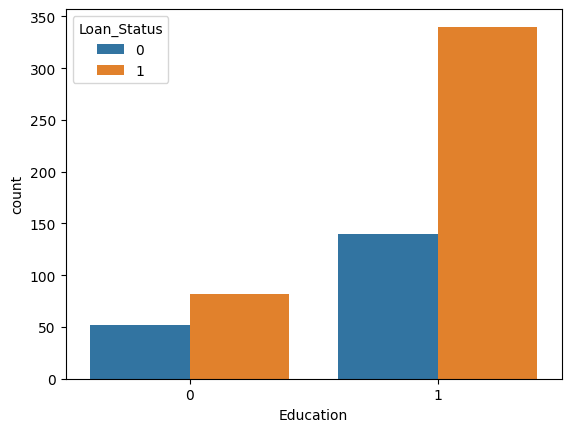

In [21]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

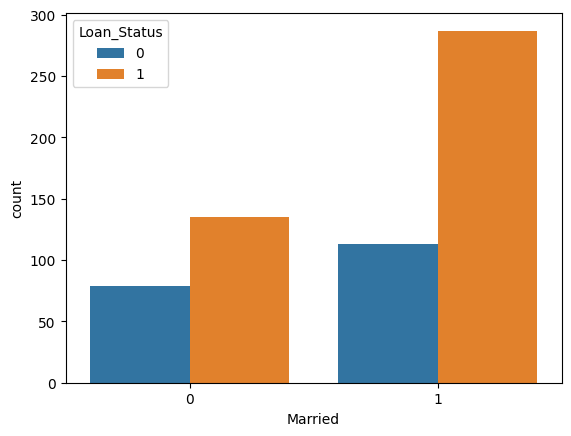

In [22]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Education'>

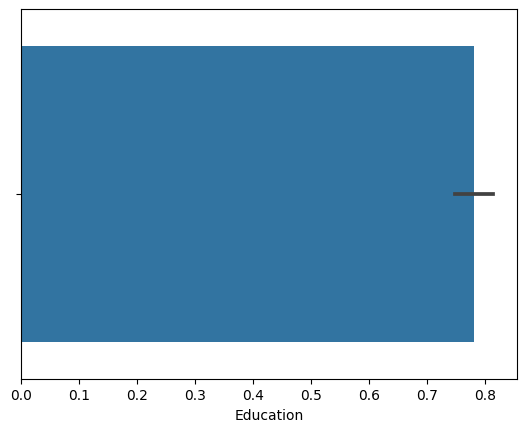

In [23]:
sns.barplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married'>

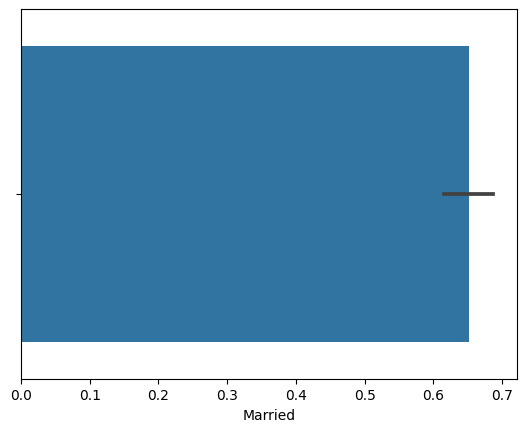

In [24]:
# marital status & Loan Status
sns.barplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [25]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,120.0,360,1,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360,1,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360,1,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360,1,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360,1,2,1


In [26]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [27]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome   
0         1        0          0          1              0             5849  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Train Test Split

In [28]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(614, 11) (552, 11) (62, 11)


Training the model:

Support Vector Machine Model

In [30]:
classifier = svm.SVC(kernel='linear')

In [31]:
#training the support Vector Macine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')



```
`# This is formatted as code`
```

Model Evaluation- Testing the model

In [32]:
# predictions = classifier.fit(X_train,Y_train).predict(X_test)
predictions = classifier.predict(X_test)
predictions

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [33]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [34]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7807971014492754


In [35]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [36]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.7741935483870968


Making a predictive system

In [37]:
#Confusion matrix
confusion_mat = confusion_matrix(Y_test, predictions)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])

In [38]:
confusion_df

,Predicted neg,Predicted pos
Actual neg,9,10
Actual pos,4,39


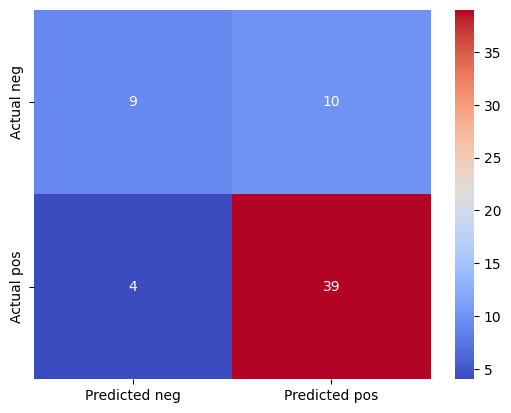

In [39]:
Color_conf_matrix = sns.heatmap(confusion_df, cmap='coolwarm',annot = True)

In [40]:
#Classification Report
from sklearn import metrics
print('\n**Classification Report:\n',metrics.classification_report(Y_test,predictions))


**Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.47      0.56        19
           1       0.80      0.91      0.85        43

    accuracy                           0.77        62
   macro avg       0.74      0.69      0.71        62
weighted avg       0.76      0.77      0.76        62



In [41]:
#Deploying the model
pred_new=classifier.predict([[1.0,	1.0,	0	,0,	0.0,	2583,	2358.0,	120.0,360.0,	1.0,	2]])
pred_new

c:\Users\91935\OneDrive\Desktop\bank\env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

Training the model by Logistic Regression


In [42]:
#Training the model through Logistic regression
from sklearn.linear_model import LogisticRegression
my_model = LogisticRegression()
my_model= LogisticRegression(solver='lbfgs', max_iter=1000)
result = my_model.fit(X_train, Y_train)

In [43]:
#Testing the model
predictions = result.predict(X_test)
predictions

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [44]:
accuracy_score(Y_test, predictions)

0.7419354838709677

In [45]:
confusion_mat = confusion_matrix(Y_test, predictions)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
confusion_df

,Predicted neg,Predicted pos
Actual neg,9,10
Actual pos,6,37


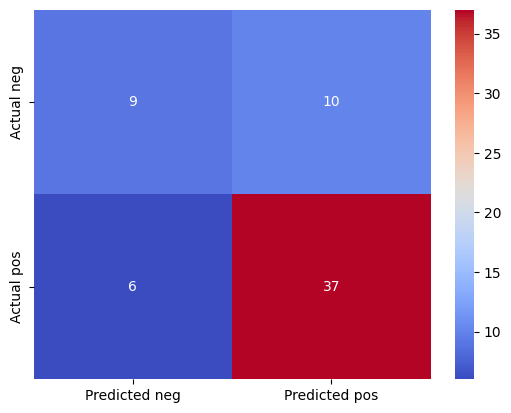

In [46]:
Color_conf_matrix = sns.heatmap(confusion_df, cmap='coolwarm',annot = True)

In [47]:
print('\n**Classification Report:\n',metrics.classification_report(Y_test,predictions))


**Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.47      0.53        19
           1       0.79      0.86      0.82        43

    accuracy                           0.74        62
   macro avg       0.69      0.67      0.68        62
weighted avg       0.73      0.74      0.73        62



In [48]:
#Deploying the model
pred_new=my_model.predict([[1.0,	1.0,	0	,0,	0.0,	2583,	2358.0,	120.0,360.0,	1.0,	2]])
pred_new

c:\Users\91935\OneDrive\Desktop\bank\env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

Training the model by Decision tree

In [49]:
#Training the model through decision tree

from sklearn.tree import DecisionTreeClassifier
my_model = DecisionTreeClassifier(random_state=0)
result = my_model.fit(X_train,Y_train)

In [50]:
#Testing the model
predictions = result.predict(X_test)
predictions

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [51]:
accuracy_score(Y_test,predictions)

0.7096774193548387

In [52]:
confusion_mat = confusion_matrix(Y_test, predictions)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])
confusion_df

,Predicted neg,Predicted pos
Actual neg,11,8
Actual pos,10,33


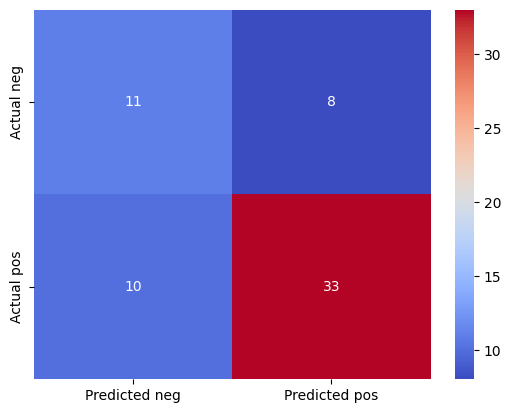

In [53]:
Color_conf_matrix = sns.heatmap(confusion_df, cmap='coolwarm',annot = True)

In [54]:
print('\n**Classification Report:\n',metrics.classification_report(Y_test,predictions))


**Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.58      0.55        19
           1       0.80      0.77      0.79        43

    accuracy                           0.71        62
   macro avg       0.66      0.67      0.67        62
weighted avg       0.72      0.71      0.71        62



In [55]:
#Deploying the model
pred_new=my_model.predict([[1.0,	1.0,	0	,0,	0.0,	2583,	2358.0,	120.0,360.0,	1.0,	2]])
pred_new

c:\Users\91935\OneDrive\Desktop\bank\env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

Training the model by Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
my_model = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
result=my_model.fit(X_train, Y_train)

Testing the model

In [57]:
predictions = result.predict(X_test)
predictions

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [58]:
from sklearn import metrics

In [59]:
print("Accuracy:",metrics.accuracy_score(Y_test, predictions))

Accuracy: 0.7419354838709677


In [60]:
from sklearn.metrics import confusion_matrix

<Axes: >

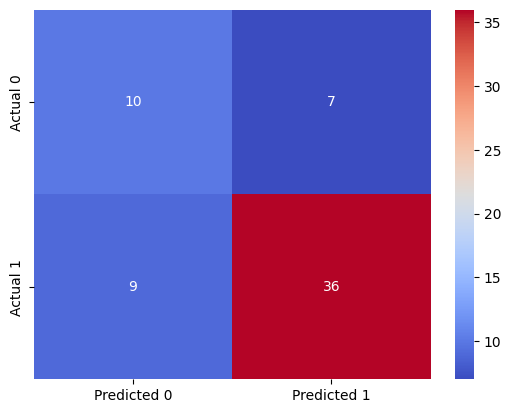

In [61]:
conf_matrix =confusion_matrix(predictions,Y_test)
confusion_df = pd.DataFrame(conf_matrix, index=['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])
sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

In [62]:
from sklearn import metrics
print('\n**Classification Report:\n',metrics.classification_report(Y_test,predictions))


**Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.53      0.56        19
           1       0.80      0.84      0.82        43

    accuracy                           0.74        62
   macro avg       0.69      0.68      0.69        62
weighted avg       0.74      0.74      0.74        62



In [63]:
#Deploying the model
pred_new=my_model.predict([[1.0,	1.0,	0	,0,	0.0,	2583,	2358.0,	120.0,360.0,	1.0,	2]])
pred_new

c:\Users\91935\OneDrive\Desktop\bank\env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

Training the model by KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier
my_model = KNeighborsClassifier(n_neighbors = 3)
result = my_model.fit(X_train,Y_train)

In [65]:
predictions = result.predict(X_test)
predictions

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [66]:
print('With KNN (K=3) accuracy is: ', result.score(X_test,Y_test))

With KNN (K=3) accuracy is:  0.6129032258064516


In [67]:
from sklearn.metrics import confusion_matrix

<Axes: >

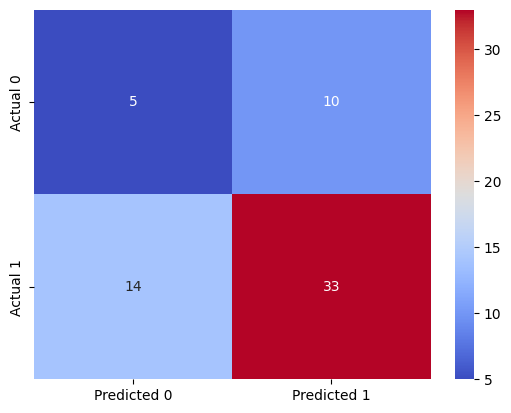

In [68]:
conf_matrix =confusion_matrix(predictions,Y_test)
confusion_df = pd.DataFrame(conf_matrix, index=['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])
sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

In [69]:
from sklearn import metrics
print('\n**Classification Report:\n',metrics.classification_report(Y_test,predictions))


**Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.26      0.29        19
           1       0.70      0.77      0.73        43

    accuracy                           0.61        62
   macro avg       0.52      0.52      0.51        62
weighted avg       0.59      0.61      0.60        62



In [70]:
#Deploying the model
pred_new=my_model.predict([[1.0,	1.0,	0	,0,	0.0,	2583,	2358.0,	120.0,360.0,	1.0,	2]])
pred_new

c:\Users\91935\OneDrive\Desktop\bank\env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

So according to the accuracy score of each model SVM is the best Model with accuracy score of **0.8064**
